In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [193]:
df_final = pd.read_csv('properatti_geo_v2.csv')
df_final.head(2)

,Unnamed: 0,Unnamed: 0.1,id,barrio_real,total,cubierta,precio,piso,habs,expensas,...,parrilla,balcon,cochera,nuevo,geometry,dist_comisarias,dist_subte,dist_trenes,dist_metrobus,habitaciones_final
0,0,0,2,LINIERS,55.0,55.0,1309.090909,NaN,NaN,NaN,...,0,0,0,0,POINT (-58.5229825 -34.6522615),2133.629728,5444.155315,1512.704661,1578.836380,2.0
1,1,1,7,BELGRANO,45.0,40.0,3066.666667,NaN,NaN,NaN,...,0,0,0,0,POINT (-58.443362 -34.5598729),564.095028,1068.595967,585.038122,1019.907337,1.0


### Matriz de Correlaciones

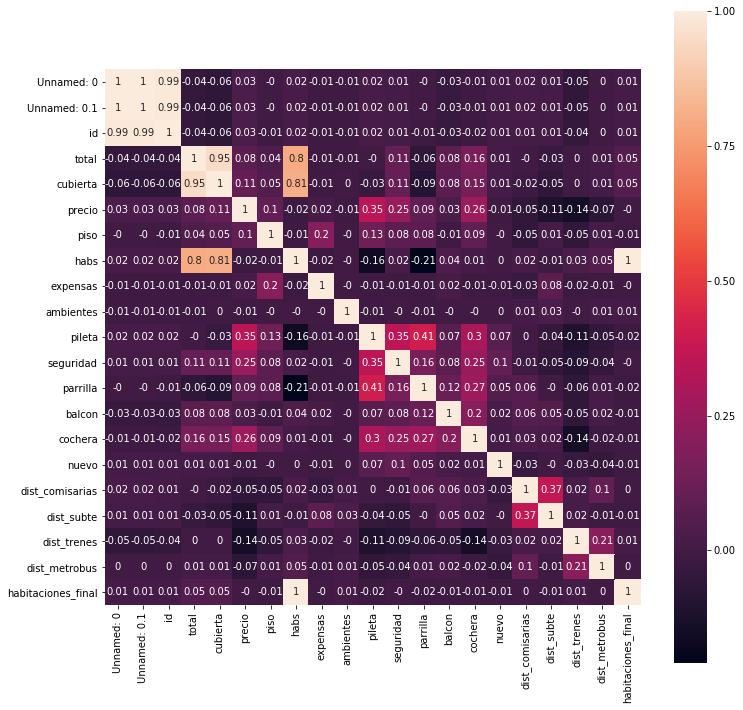

In [177]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(round(df_final.corr() , 2) , square=True , annot=True)

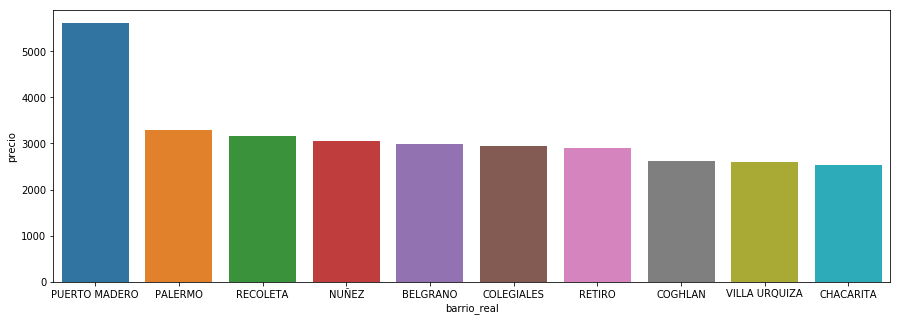

In [183]:
#Top Ten Barrios con precio promedio mas alto

mean_by_barrio = df_final[['barrio_real' , 'precio']].groupby('barrio_real').mean().round(0).astype('int')

top_ten_barrios = mean_by_barrio.sort_values(by='precio',ascending=False).head(10)


plt.figure(figsize=(15,5))
sns.barplot(x=top_ten_barrios.index,y=top_ten_barrios.precio)
plt.show()

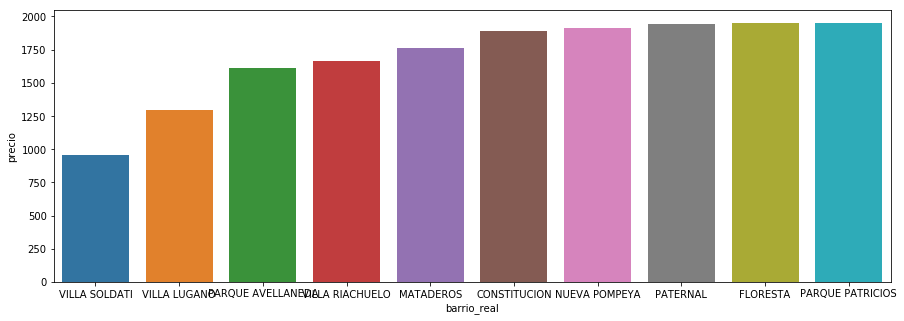

In [184]:
#Bottom Ten Barrios con precio promedio mas bajo

bottom_ten_barrios = mean_by_barrio.sort_values(by='precio' , ascending=True).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=bottom_ten_barrios.index,y=bottom_ten_barrios.precio)
plt.show()

## Distribucion de la variable Precio

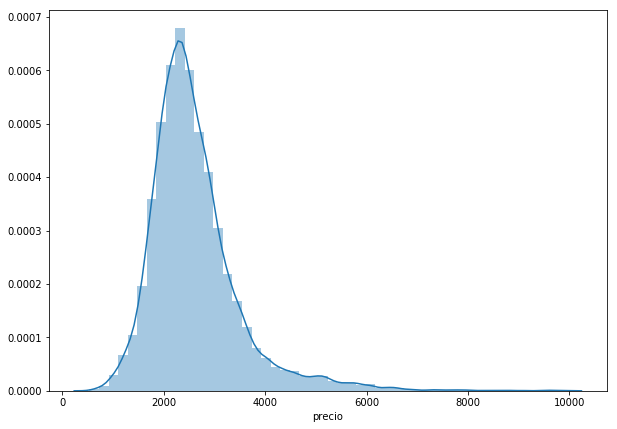

In [185]:
plt.figure(figsize=(10,7))
sns.distplot(df_final.precio)
plt.show()

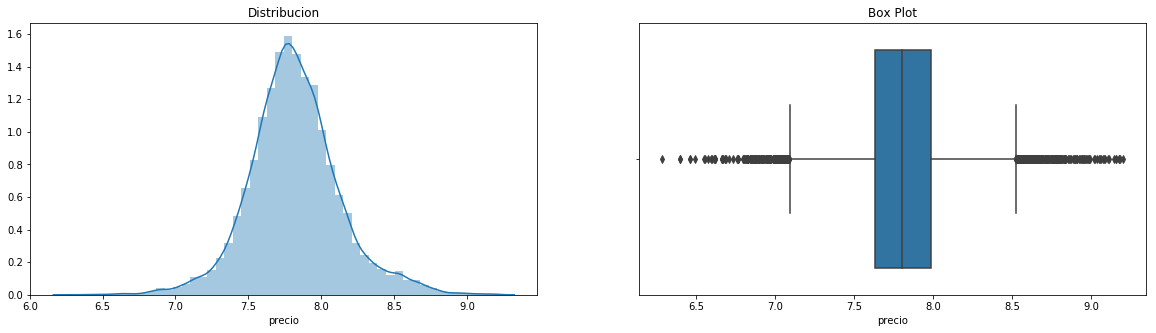

In [186]:
## Transformando logaritmicamente la variable Precio:
precio_log = np.log(df_final.precio)

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title("Distribucion")
sns.distplot(precio_log)
plt.subplot(122)
plt.title("Box Plot")
sns.boxplot(precio_log)
plt.show()

(0, 0.002)

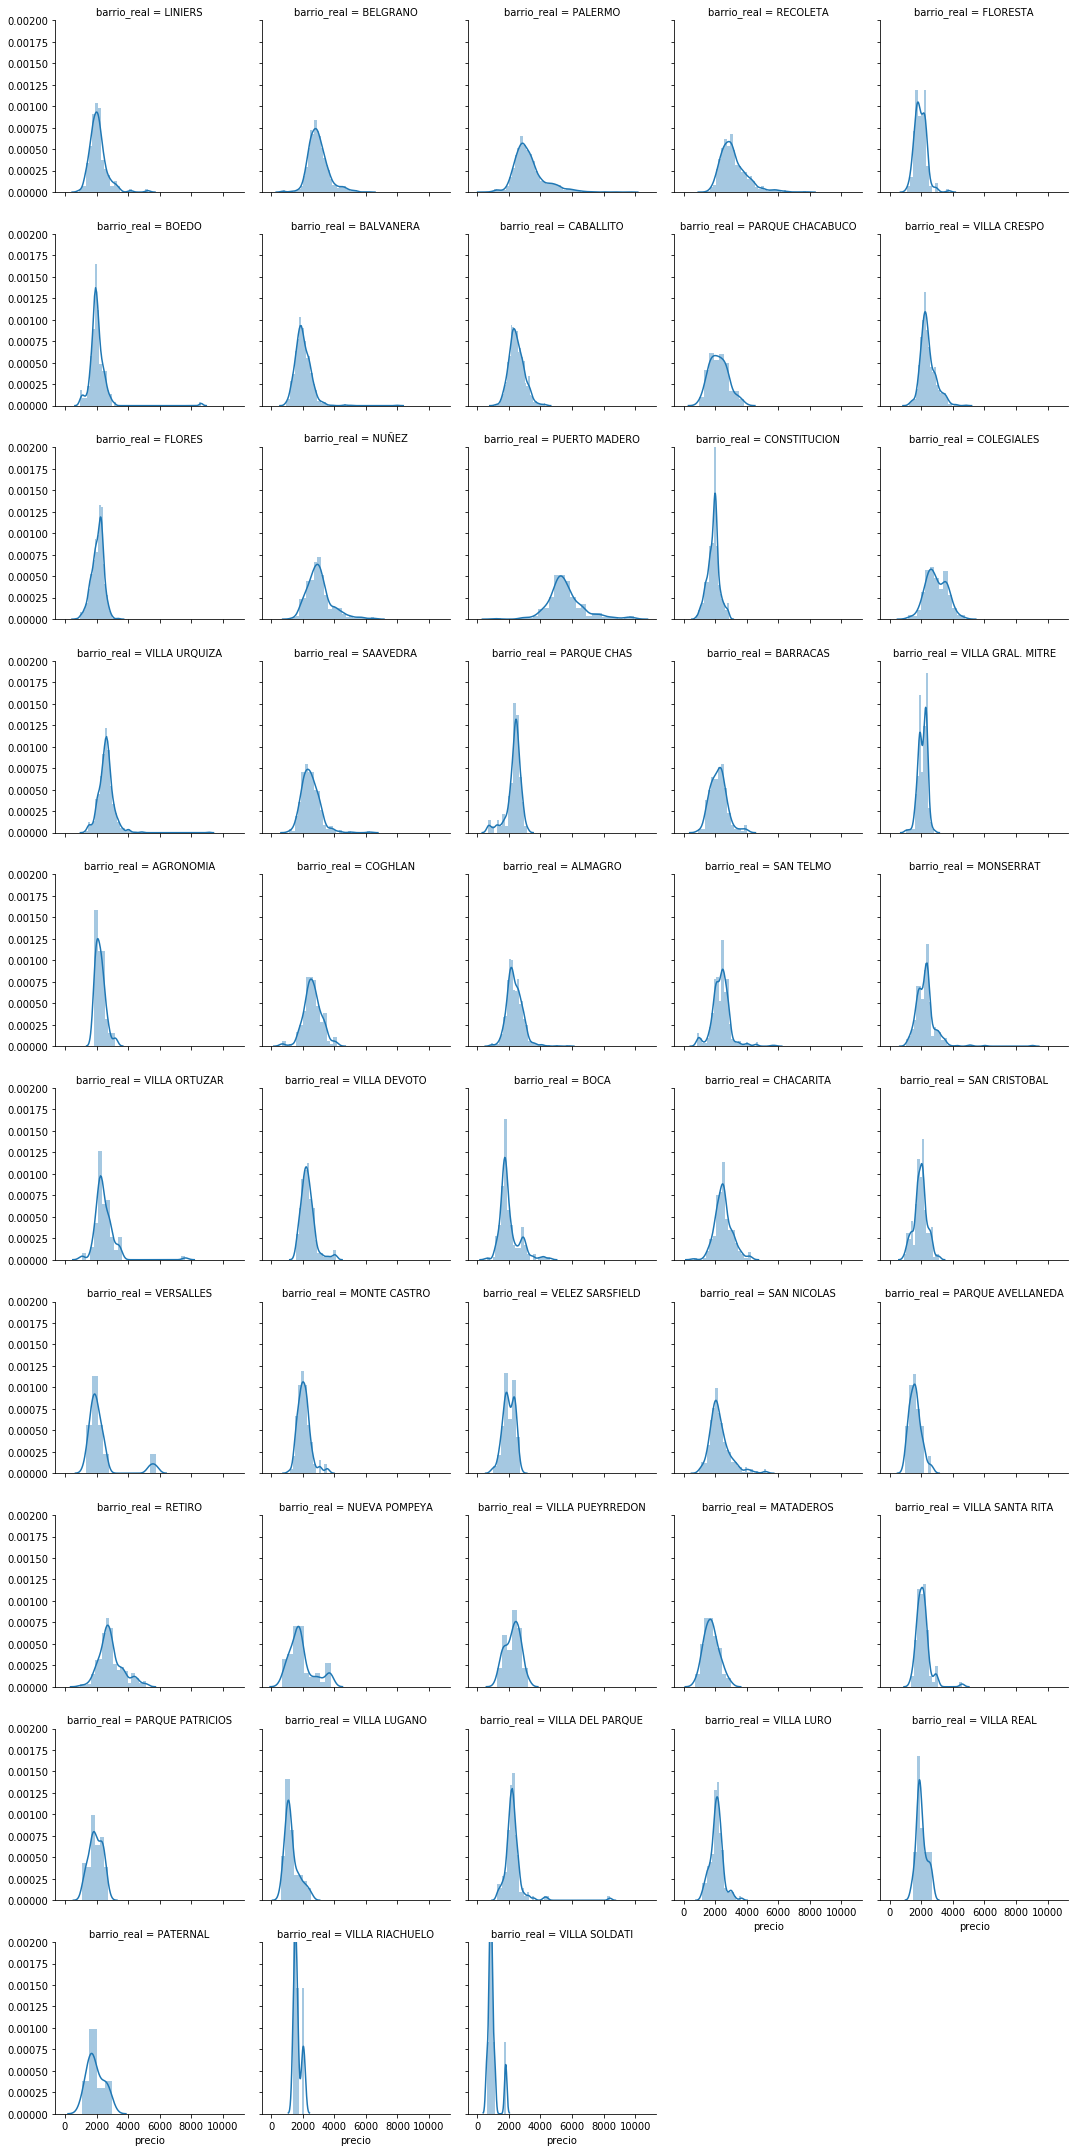

In [187]:
#Distribucion de la variable precio por barrio
g = sns.FacetGrid(df_final, col="barrio_real" , col_wrap=5)
g.map(sns.distplot ,   "precio" )
plt.ylim(0, 0.002)

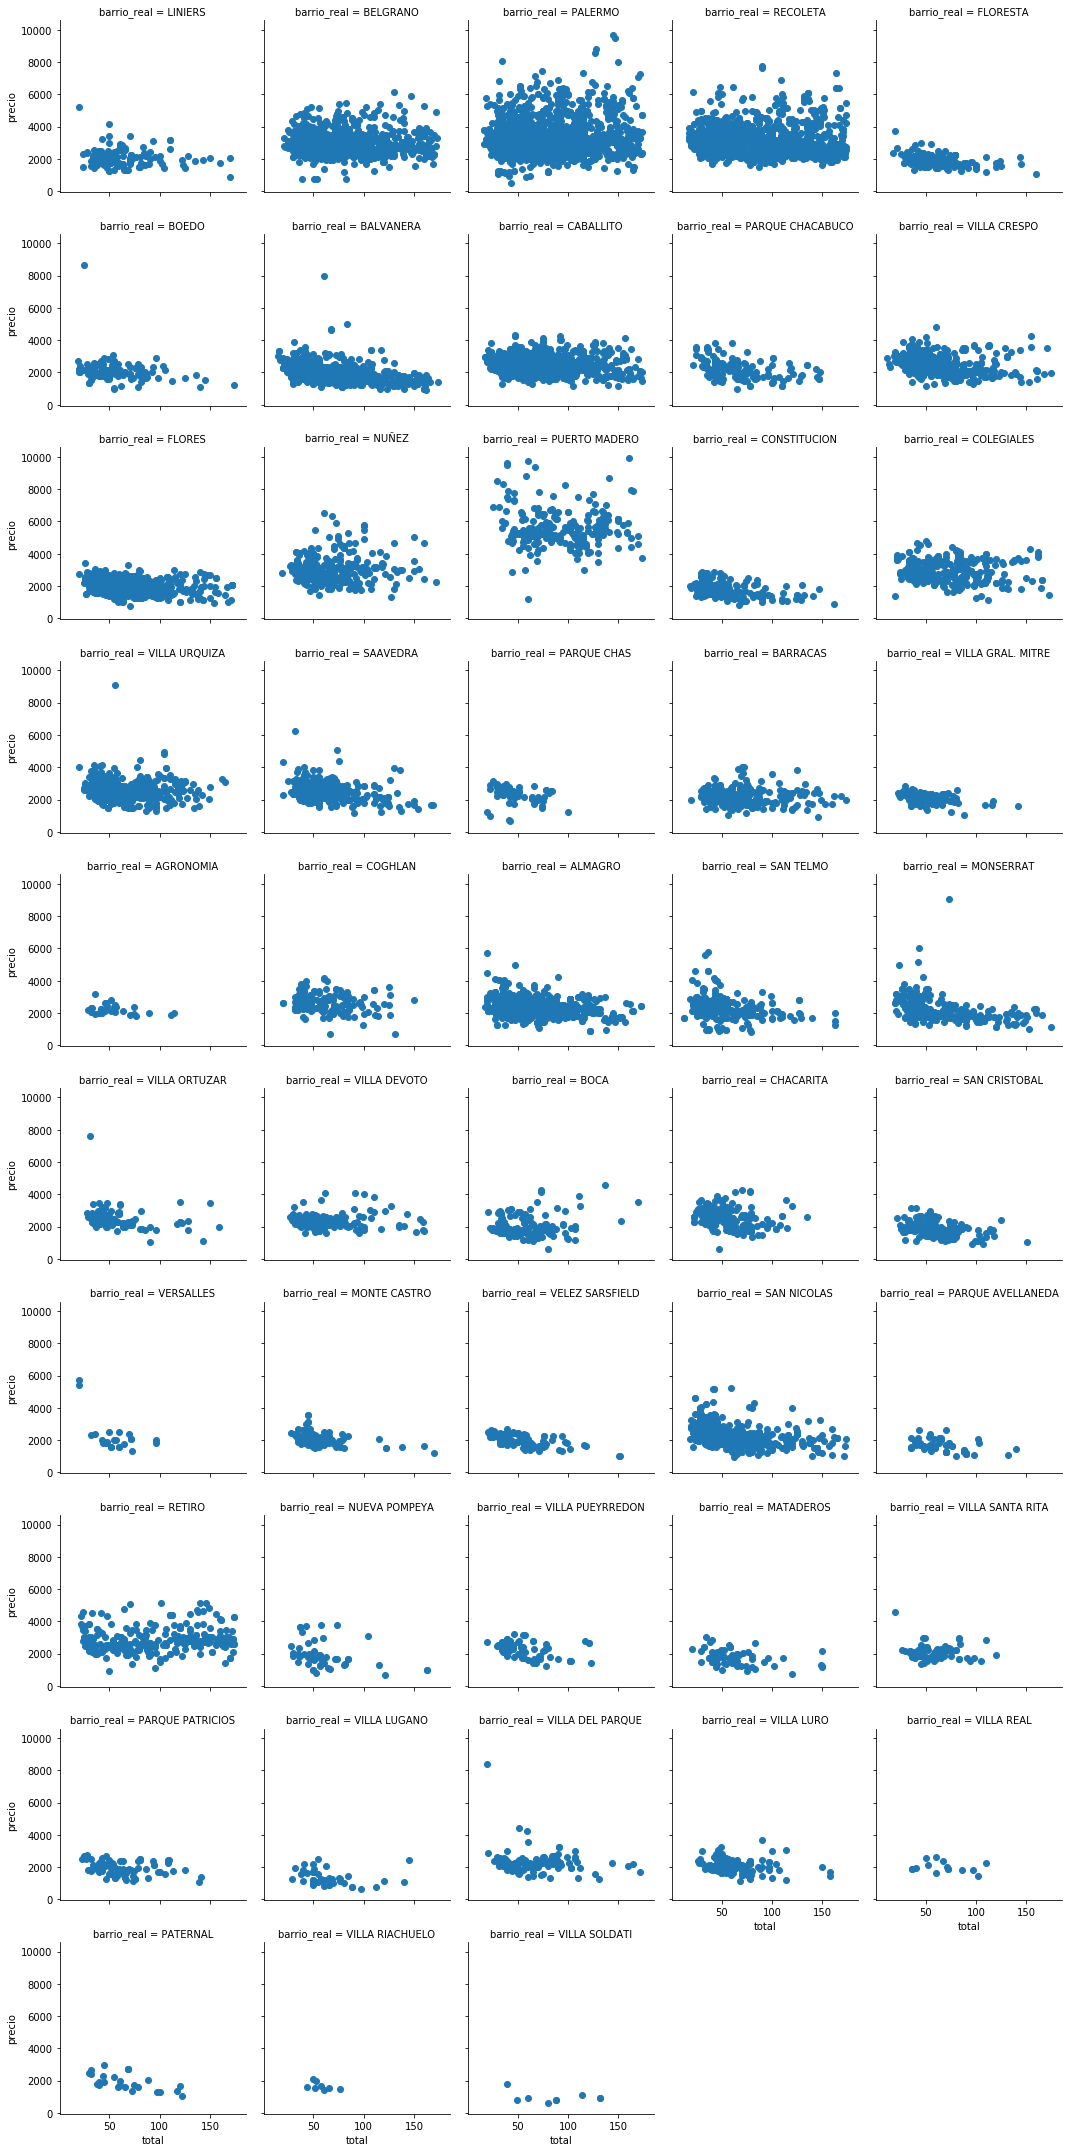

In [198]:
#Relacion entre la superficie Total y el Precio por Barrio
g = sns.FacetGrid(df_final, col="barrio_real" , col_wrap=5)
g.map(plt.scatter , 'total' , 'precio')

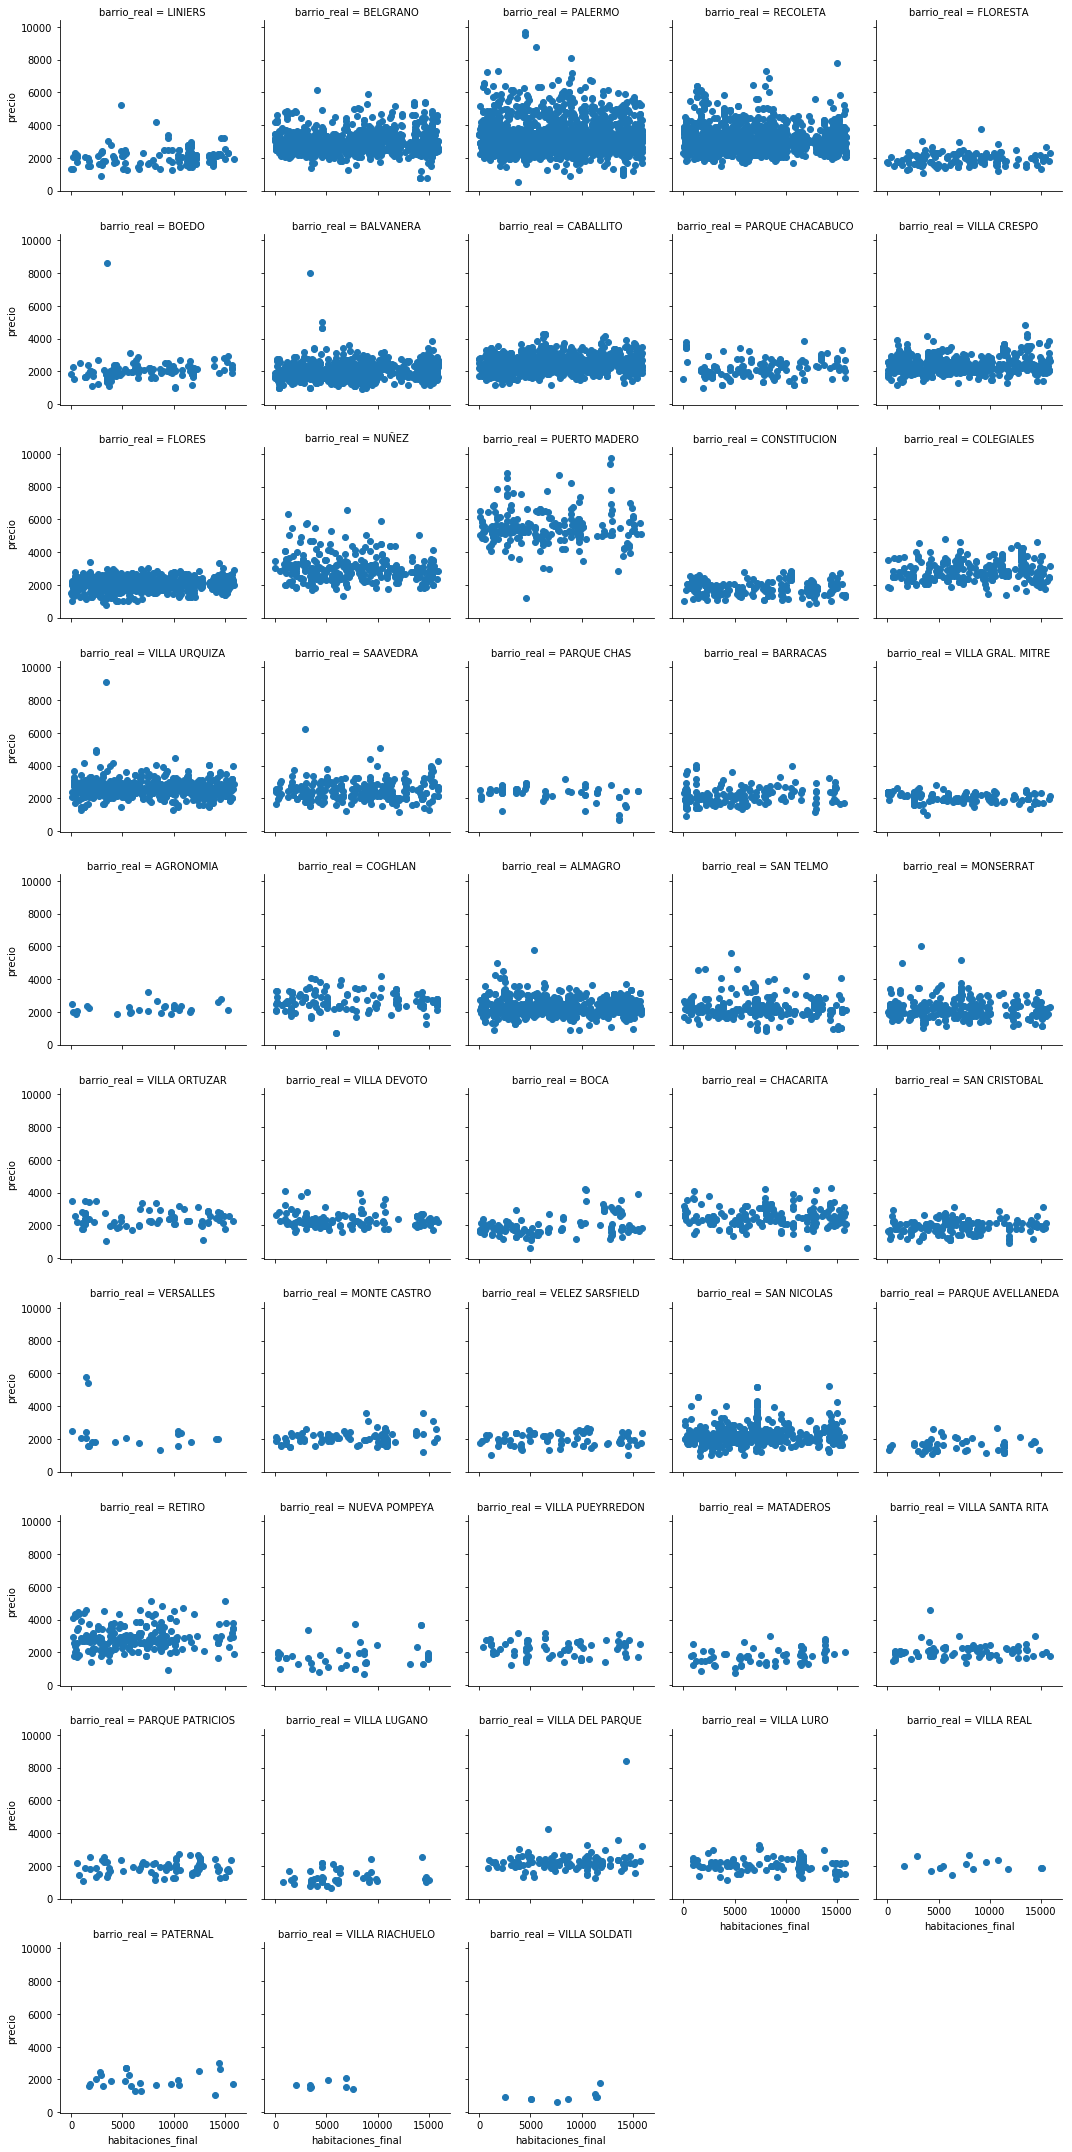

In [199]:
#Relacion entre la cantidad de Habitaciones y el Precio por Barrio
df_final['habitaciones_final'] = df_final[df_final['habitaciones_final'] < 30]
g = sns.FacetGrid(df_final, col="barrio_real" , col_wrap=5)
g.map(plt.scatter , 'habitaciones_final' , 'precio')